In [3]:
import pandas as pd

analisis_cancer = pd.read_csv("Data/analisis_cancer.csv")
imagenes_paciente = pd.read_csv("Data/historial_medico_imagenes.csv")
historial_medico = pd.read_csv("Data/historial_medico.csv")

In [4]:
print(analisis_cancer.columns.to_list())
print(imagenes_paciente.columns.to_list())
print(historial_medico.columns.to_list())

['id', 'cancer_stage', 'tumor_size', 'early_detection', 'inflammatory_bowel_disease', 'relapse']
['id', 'Imagename']
['id', 'Sexo', 'Age', 'Family history', 'smoke', 'alcohol', 'obesity', 'diet', 'Screening_History', 'Healthcare_Access', 'Survival_Prediction']


In [5]:
print(analisis_cancer.isna().sum())
print(imagenes_paciente.isna().sum())
print(historial_medico.isna().sum())

id                            0
cancer_stage                  0
tumor_size                    0
early_detection               0
inflammatory_bowel_disease    0
relapse                       0
dtype: int64
id           0
Imagename    0
dtype: int64
id                     0
Sexo                   0
Age                    0
Family history         0
smoke                  0
alcohol                0
obesity                0
diet                   0
Screening_History      0
Healthcare_Access      0
Survival_Prediction    0
dtype: int64


In [6]:
df_merged = pd.merge(historial_medico, analisis_cancer, on='id', how='inner')
df_merged = pd.merge(df_merged, imagenes_paciente, on='id', how='inner')

df_merged.to_csv("data/merged.csv",index=False)

In [7]:
df_merged.head()

,id,Sexo,Age,Family history,smoke,alcohol,obesity,diet,Screening_History,Healthcare_Access,Survival_Prediction,cancer_stage,tumor_size,early_detection,inflammatory_bowel_disease,relapse,Imagename
0,1,M,63,No,Yes,Yes,Normal,Moderate,Never,High,Yes,Localized,48,Yes,No,No,colonn1
1,2,M,64,Yes,Yes,No,Normal,Low,Irregular,Moderate,Yes,Localized,33,Yes,No,No,colonn2
2,3,F,50,No,Yes,No,Normal,Moderate,Regular,Moderate,Yes,Localized,34,No,No,No,colonn3
3,4,M,67,Yes,No,No,Normal,Moderate,Regular,Low,Yes,Localized,34,No,No,No,colonn4
4,5,M,81,No,Yes,No,Overweight,Moderate,Never,High,Yes,Localized,31,Yes,No,No,colonn5


In [8]:
df_merged.describe()

,id,Age,tumor_size
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,69.069600,41.82660
std,2886.89568,11.880601,21.52126
min,1.00000,30.000000,5.00000
25%,2500.75000,59.000000,23.00000
50%,5000.50000,69.000000,42.00000
75%,7500.25000,79.000000,60.00000
max,10000.00000,89.000000,79.00000


In [9]:
df_merged.dtypes

id                             int64
Sexo                          object
Age                            int64
Family history                object
smoke                         object
alcohol                       object
obesity                       object
diet                          object
Screening_History             object
Healthcare_Access             object
Survival_Prediction           object
cancer_stage                  object
tumor_size                     int64
early_detection               object
inflammatory_bowel_disease    object
relapse                       object
Imagename                     object
dtype: object

In [10]:
df_merged_dummies = pd.get_dummies(df_merged, columns=['cancer_stage', 'obesity', 'diet', 'Screening_History', 'Healthcare_Access'], drop_first=True, dtype=int)

# Reemplazamos 'Yes' y 'No' por 1 y 0 en todo el DataFrame
df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})
df_merged_dummies = df_merged_dummies.replace({'True': 1, 'False': 0})

df_merged_dummies.head()

df_merged_dummies.to_csv("data/merged_dummies.csv",index=False)

C:\Users\diego\AppData\Local\Temp\ipykernel_9632\308792497.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
C:\Users\diego\AppData\Local\Temp\ipykernel_9632\308792497.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})


## VISUALIZAR LA MATRIZ DE CORRELACIÓN

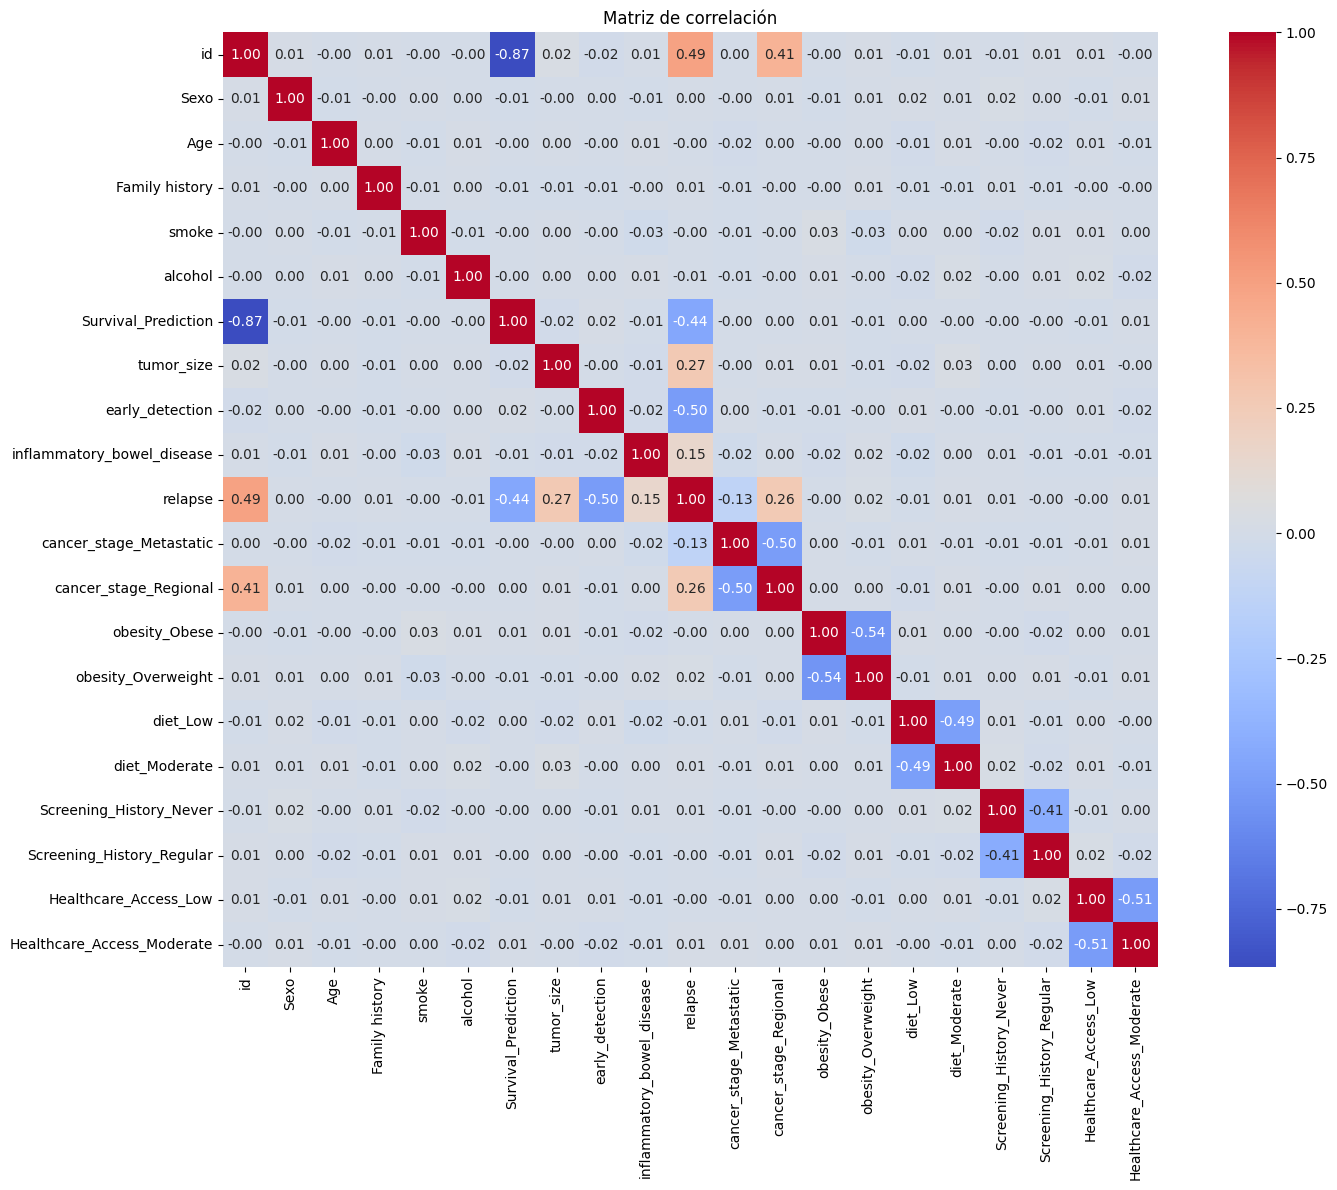

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = df_merged_dummies.corr(numeric_only=True)

# Creamos la visualización
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd

# Cargar el CSV limpio
df = pd.read_csv("data/merged_dummies.csv")  # (usamos / por compatibilidad)

# Calcular correlación con la variable objetivo 'survival_prediction'
correlaciones = df.corr(numeric_only=True)['Survival_Prediction'].drop('Survival_Prediction')

# Ordenar por correlación absoluta descendente
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)

# Ver top 15 más correlacionadas
top_variables = correlaciones_ordenadas.head(6).index.tolist()
print("Top variables más correlacionadas con 'Survival_Prediction':")
print(top_variables)



Top variables más correlacionadas con 'Survival_Prediction':
['id', 'relapse', 'tumor_size', 'early_detection', 'Sexo', 'inflammatory_bowel_disease']


In [42]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("Data\merged_dummies.csv")

# Seleccionar las columnas necesarias
columnas_utiles = ['relapse', 'tumor_size', 'early_detection', 'Sexo', 'inflammatory_bowel_disease', 'Imagename', 'Survival_Prediction']
df = df[columnas_utiles]

# Eliminar filas con datos faltantes
df = df.dropna()

# Verificar
print(df.head())
print("Forma final del dataset:", df.shape)


   relapse  tumor_size  early_detection  Sexo  inflammatory_bowel_disease  \
0        0          48                1     1                           0   
1        0          33                1     1                           0   
2        0          34                0     0                           0   
3        0          34                0     1                           0   
4        0          31                1     1                           0   

  Imagename  Survival_Prediction  
0   colonn1                    1  
1   colonn2                    1  
2   colonn3                    1  
3   colonn4                    1  
4   colonn5                    1  
Forma final del dataset: (10000, 7)


In [65]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Ruta personalizada donde guardarás los lotes
ruta_guardado = "D:\Fotos"  # ← ¡Cambia esto por la ruta que tú quieras!
os.makedirs(ruta_guardado, exist_ok=True)

# Ruta donde están las imágenes
image_folder = 'Image'
image_size = (128, 128)
batch_size = 500

n_samples = len(df)

for i in range(0, n_samples, batch_size):
    batch_df = df.iloc[i:i+batch_size]
    batch_images = []

    for nombre in tqdm(batch_df['Imagename'], desc=f"Lote {i//batch_size + 1}"):
        path = os.path.join(image_folder, f"{nombre}.jpeg")
        if os.path.exists(path):
            img = Image.open(path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img, dtype=np.float32) / 255.0
        else:
            img_array = np.zeros((128, 128, 3), dtype=np.float32)
        batch_images.append(img_array)

    batch_array = np.array(batch_images, dtype=np.float32)
    output_path = os.path.join(ruta_guardado, f"X_img_batch_{i//batch_size + 1}.npy")
    np.save(output_path, batch_array)
    print(f"✅ Lote {i//batch_size + 1} guardado en {output_path}")


Lote 1: 100%|██████████| 500/500 [00:00<00:00, 46854.31it/s]


✅ Lote 1 guardado en D:\Fotos\X_img_batch_1.npy


Lote 2: 100%|██████████| 500/500 [00:00<00:00, 31097.02it/s]


✅ Lote 2 guardado en D:\Fotos\X_img_batch_2.npy


Lote 3: 100%|██████████| 500/500 [00:00<00:00, 70957.60it/s]


✅ Lote 3 guardado en D:\Fotos\X_img_batch_3.npy


Lote 4: 100%|██████████| 500/500 [00:00<?, ?it/s]


✅ Lote 4 guardado en D:\Fotos\X_img_batch_4.npy


Lote 5: 100%|██████████| 500/500 [00:00<00:00, 30893.63it/s]


✅ Lote 5 guardado en D:\Fotos\X_img_batch_5.npy


Lote 6: 100%|██████████| 500/500 [00:00<00:00, 19838.35it/s]


✅ Lote 6 guardado en D:\Fotos\X_img_batch_6.npy


Lote 7: 100%|██████████| 500/500 [00:00<00:00, 46729.03it/s]


✅ Lote 7 guardado en D:\Fotos\X_img_batch_7.npy


Lote 8: 100%|██████████| 500/500 [00:00<00:00, 24300.44it/s]


✅ Lote 8 guardado en D:\Fotos\X_img_batch_8.npy


Lote 9: 100%|██████████| 500/500 [00:00<00:00, 16377.99it/s]


✅ Lote 9 guardado en D:\Fotos\X_img_batch_9.npy


Lote 10: 100%|██████████| 500/500 [00:00<00:00, 30511.13it/s]


✅ Lote 10 guardado en D:\Fotos\X_img_batch_10.npy


Lote 11: 100%|██████████| 500/500 [00:00<00:00, 268212.30it/s]


✅ Lote 11 guardado en D:\Fotos\X_img_batch_11.npy


Lote 12: 100%|██████████| 500/500 [00:00<00:00, 49500.83it/s]


✅ Lote 12 guardado en D:\Fotos\X_img_batch_12.npy


Lote 13: 100%|██████████| 500/500 [00:00<00:00, 33060.38it/s]


✅ Lote 13 guardado en D:\Fotos\X_img_batch_13.npy


Lote 14: 100%|██████████| 500/500 [00:00<00:00, 44513.23it/s]


✅ Lote 14 guardado en D:\Fotos\X_img_batch_14.npy


Lote 15: 100%|██████████| 500/500 [00:00<00:00, 27161.66it/s]


✅ Lote 15 guardado en D:\Fotos\X_img_batch_15.npy


Lote 16: 100%|██████████| 500/500 [00:00<00:00, 20110.01it/s]


✅ Lote 16 guardado en D:\Fotos\X_img_batch_16.npy


Lote 17: 100%|██████████| 500/500 [00:00<00:00, 45310.52it/s]


✅ Lote 17 guardado en D:\Fotos\X_img_batch_17.npy


Lote 18: 100%|██████████| 500/500 [00:00<00:00, 48542.94it/s]


✅ Lote 18 guardado en D:\Fotos\X_img_batch_18.npy


Lote 19: 100%|██████████| 500/500 [00:00<00:00, 25837.18it/s]


✅ Lote 19 guardado en D:\Fotos\X_img_batch_19.npy


Lote 20: 100%|██████████| 500/500 [00:00<00:00, 21019.66it/s]


✅ Lote 20 guardado en D:\Fotos\X_img_batch_20.npy


In [66]:
# Ruta donde guardaste las imágenes
ruta_guardado = "D:\Fotos"  # usa la misma que usaste antes
os.makedirs(ruta_guardado, exist_ok=True)

# Columnas clínicas que usarás
columnas_clinicas = ['relapse', 'tumor_size', 'early_detection', 'Sexo', 'inflammatory_bowel_disease']

for i in range(0, len(df), batch_size):
    batch_df = df.iloc[i:i+batch_size]

    # Variables clínicas
    X_tab = batch_df[columnas_clinicas].astype(np.float32).values
    y = batch_df['Survival_Prediction'].astype(np.float32).values

    # Guardar en paralelo con los lotes de imágenes
    np.save(os.path.join(ruta_guardado, f"X_tab_batch_{i//batch_size + 1}.npy"), X_tab)
    np.save(os.path.join(ruta_guardado, f"y_batch_{i//batch_size + 1}.npy"), y)

    print(f"✅ Lote {i//batch_size + 1} (tabulares + etiquetas) guardado")


✅ Lote 1 (tabulares + etiquetas) guardado
✅ Lote 2 (tabulares + etiquetas) guardado
✅ Lote 3 (tabulares + etiquetas) guardado
✅ Lote 4 (tabulares + etiquetas) guardado
✅ Lote 5 (tabulares + etiquetas) guardado
✅ Lote 6 (tabulares + etiquetas) guardado
✅ Lote 7 (tabulares + etiquetas) guardado
✅ Lote 8 (tabulares + etiquetas) guardado
✅ Lote 9 (tabulares + etiquetas) guardado
✅ Lote 10 (tabulares + etiquetas) guardado
✅ Lote 11 (tabulares + etiquetas) guardado
✅ Lote 12 (tabulares + etiquetas) guardado
✅ Lote 13 (tabulares + etiquetas) guardado
✅ Lote 14 (tabulares + etiquetas) guardado
✅ Lote 15 (tabulares + etiquetas) guardado
✅ Lote 16 (tabulares + etiquetas) guardado
✅ Lote 17 (tabulares + etiquetas) guardado
✅ Lote 18 (tabulares + etiquetas) guardado
✅ Lote 19 (tabulares + etiquetas) guardado
✅ Lote 20 (tabulares + etiquetas) guardado


In [68]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# ========== Entrada de imagen (224x224x3) ==========
input_img = Input(shape=(128, 128, 3), name="imagen")
base_cnn = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_cnn.trainable = False

x_img = base_cnn(input_img)
x_img = GlobalAveragePooling2D()(x_img)
x_img = Dropout(0.3)(x_img)

# ========== Entrada de datos clínicos ==========
input_tab = Input(shape=(5,), name="clinico")  # porque usas 5 variables
x_tab = Dense(64, activation='relu')(input_tab)
x_tab = Dropout(0.3)(x_tab)
x_tab = Dense(32, activation='relu')(x_tab)

# ========== Combinar ambas ramas ==========
x = Concatenate()([x_img, x_tab])
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid', name="salida")(x)

# ========== Modelo final ==========
modelo_hibrido = Model(inputs=[input_img, input_tab], outputs=output)
modelo_hibrido.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

modelo_hibrido.summary()

modelo_hibrido.save("modelo_hibrido_inicial.keras")



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ imagen (InputLayer) │ (None, 128, 128,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clinico             │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_1… │ (None, 4, 4,      │  2,257,984 │ imagen[0][0]      │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │        384 │ clinico[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_15[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 1280)      │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      2,080 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 1312)      │          0 │ dropout_10[0][0], │
│ (Concatenate)       │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │     84,032 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida (Dense)      │ (None, 1)         │         65 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,344,545 (8.94 MB)

 Trainable params: 86,561 (338.13 KB)

 Non-trainable params: 2,257,984 (8.61 MB)